## <h3 align="center"> **Atividade Prática**</h3> 




<h3 align="center"> Data: 21-07-2020 </h3> 

# Vamos iniciar trabalhando com os diferentes métodos de geração de conjuntos de classificadores. 


In [2]:
# Importando bibliotecas necessárias
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn

Vamos utilizar a base **Iris**

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

Relembrando a base Iris


---


![texto alternativo](https://drive.google.com/uc?export=view&id=1y60Qw8n06cfSgDXL_sqHFaTYQl-tTpmE) 

In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# Particionando a base em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [7]:
#Como as estão distribuídas entre as partições
print("Particao de Treino", X_train.shape)
print("Particao de Teste", X_test.shape)

Particao de Treino (112, 4)
Particao de Teste (38, 4)


## **Será que um comitê é sempre melhor do que um preditor individual?**
 Aqui, nós vamos comparar Bagging, Boosting e Random Forest, todos utilizados com o Árvore de Decisão como algoritmo de base. 
 Nós vamos comparar o resultado obtido por cada método de geração de conjunto com o resultado de uma árvore de decisão.

In [8]:
# Chamando os métodos que serão utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Para avaliação
from sklearn.metrics import accuracy_score


Agora,vamos testar os métodos de geração de conjuntos básicos todos utilizando Árvores de Decisão como Classificadores de base

In [9]:
#Bagging : gerando o modelo

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=15, random_state=0)

# Treinando, testando e avaliando
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_bag))

0.9736842105263158


In [10]:
#Random Forest

randomForest = RandomForestClassifier(max_depth=1, random_state=0)


randomForest.fit(X_train, y_train)
yPredRF = randomForest.predict(X_test)

print(accuracy_score(y_test, yPredRF))

0.9473684210526315


In [11]:
#AdaBoost

adaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)

adaBoost.fit(X_train, y_train)
yPredAB = adaBoost.predict(X_test)

print(accuracy_score(y_test, yPredAB))



0.8947368421052632


In [12]:
#GradientBoost

gradientBoost = GradientBoostingClassifier(random_state=0)

gradientBoost.fit(X_train, y_train)

yPredGB = gradientBoost.predict(X_test)

print(accuracy_score(y_test, yPredGB))

0.9736842105263158


E somente uma árvore de decisão? Qual será o resultado?

In [13]:
# Árvore de Decisão
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)
y_pred_DT = DT_clf.predict(X_test)

# Avaliação
print(accuracy_score(y_test, y_pred_DT))

0.9736842105263158


**Modificando a base de Dados**

Nós vamos fazer o mesmo teste, só que utilizando a base de dados Brest Cancer.

**Relembrando a base Brest Cancer**

Neste exemplo, nós utilizaremos a base **Breast Cancer** disponível no sklearn, mas originário do repositório da UCI (https://archive.ics.uci.edu/ml/datasets/breast+cancer). Trata-se de uma base de dados que foi obtida a partir de imagens digitalizadas de massas mamárias e que descrevem **dois** tipos de classe: maligno (harmful) e benigno (not harmful). Os atributos descrevem características dos núcleos celulares presentes nas imagens.

No total, são **30 atributos** ordenados: raio médio, textura média, perímetro médio, área média, suavidade média, compacidade média, concavidade média, pontos côncavos médios, simetria média, dimensão fractal média, erro de raio, erro de textura, erro de perímetro, erro de área, erro de suavidade, erro de compactação, erro de concavidade, erro de pontos côncavos, erro de simetria, erro de dimensão fractal, pior raio, pior textura, pior perímetro, pior área, pior suavidade, pior compacidade, pior concavidade, piores pontos côncavos, pior simetria e pior dimensão fractal) e um alvo (tipo de câncer).



In [14]:
#Carregando a base de dados
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [15]:
#Verificando quantidade de instâncias e de atributos
# Vamos também acessar os dados

print(cancer.data.shape)
cancer.data

(569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
# E  as classes
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Como nós faremos ajustes dos parâmetros dos métodos de geração de conjuntos, nós vamos dividir a base em três partições: treino, validação e teste. A base de treino terá 60% das instâncias, enquanto as bases de teste e de validação terão 20% cada.

In [17]:
#Vamos, inicialmente, dividir a base em duas partições: treino e teste. A base de treino terá 80% das instâncias, enquanto a de teste terá 20%

from sklearn.model_selection import train_test_split

#Dividindo a base (com seleção de instâncias aleatória)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


Agora vamos dividir a base de treino em duas bases: treino e validação. Ao final, a base de treino terá 60% das instâncias originais, enquanto a base de validação terá 20%, assim como a base de teste já criada.

In [18]:
#Dividindo a base de treino (com seleção de instâncias aleatória)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(341, 30) (341,)
(114, 30) (114,)


Agora nós vamos comparar o desempenho dos métodos de **Conjuntos de Classificadores** novamente utilizando **Árvore de Decisão** como algoritmo de base. Antes de utilizarmos os métodos de conjuntos, vamos testar o desempenho de uma única árvore.
É importante lembrar que, como haverá **ajuste de parâmetros**, a base de teste somente poderá ser usada ao final, após os parâmetros serem todos ajustados. Portanto, para o ajuste de parâmetros, nós utilizaremos a **base de validação**. Além disso, para facilitar a observação de ocorrência de **overfitting**, nós sempre compararemos a acurária no treino e na validação.


In [19]:
# Cálculo da acurácia em validação de uma única árvore de decisão.

# Árvore de Decisão
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)
y_pred_DT = DT_clf.predict(X_val)
train_pred_DT = DT_clf.predict(X_train)

# Avaliação
print("Acurácia no treino", accuracy_score(y_train, train_pred_DT))
print("Acurácia na validação", accuracy_score(y_val, y_pred_DT))

Acurácia no treino 1.0
Acurácia na validação 0.9298245614035088


In [55]:
#Vamos fazer as predições com os métodos de geração de conjuntos

# Bagging
#BG_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=40, random_state=0)
#BG_clf.fit(X_train, y_train)
#y_pred_BG = BG_clf.predict(X_val)
#train_pred_BG = BG_clf.predict(X_train)

k=200
accuracyBG = []
accuracyBG_test = []
accuracyRange = range(k-1)

for i in range (1, k):
    BG_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=i, random_state=0)
    BG_clf.fit(X_train, y_train)
    y_pred_BG = BG_clf.predict(X_val)
    yPredBG_test = BG_clf.predict(X_test)
    accuracyBG.append(accuracy_score(y_val, y_pred_BG))
    accuracyBG_test.append(accuracy_score(y_test, yPredBG_test))

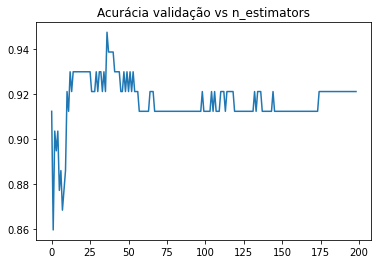

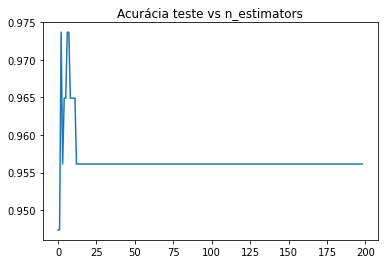

Conjunto de validação - Bagging - Acurácia 0.9473684210526315 n_estimators 36
Conjunto de teste - Bagging - Acurácia 0.8596491228070176 n_estimators 1


In [57]:
#avaliação
#plotando a acurácia em relação ao número de estimadores

plt.title('Acurácia validação vs n_estimators')
plt.plot(accuracyRange, accuracyBG)
plt.show()

plt.title('Acurácia teste vs n_estimators')
plt.plot(accuracyRange, accuracyBG_test)
plt.show()

#achando a maior acurácia a partir do número de estimadores

for i in range(0, k):
    if (accuracyBG[i] == max(accuracyBG)):
            print('Conjunto de validação - Bagging - Acurácia', accuracyBG[i], 'n_estimators', i)
            break
            
for i in range(1, k):
    if (accuracyBG_test[i] == max(accuracyBG)):
            print('Conjunto de teste - Bagging - Acurácia', accuracyBG[i], 'n_estimators', i)
            break


In [51]:
#Random Forest

#randomForest = RandomForestClassifier(max_depth=6, random_state=0)
#randomForest.fit(X_train, y_train)
#train_pred_BG = randomForest.predict(X_train)
#y_pred_BG = randomForest.predict(X_val)
#yPredRF = randomForest.predict(X_test)

k = 35
accuracyRF_val = []
accuracyRF_test = []
accuracy_Xrange = range(k-1)

for i in range (1, k):
    randomForest = RandomForestClassifier(max_depth=i, random_state=0)
    randomForest.fit(X_train, y_train)
    y_pred_RF = randomForest.predict(X_val)
    yPredRF_test = randomForest.predict(X_test)
    
    accuracyRF_test.append(accuracy_score(y_test, yPredRF_test))
    accuracyRF_val.append(accuracy_score(y_val, y_pred_RF))

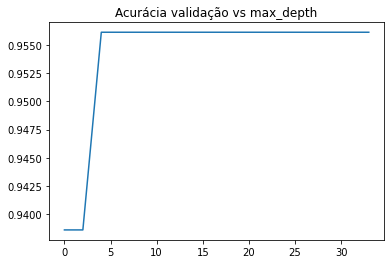

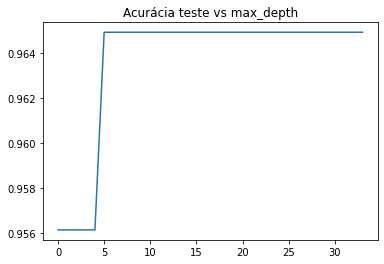

Conjunto de validação - RandomForest - Acurácia 0.956140350877193 max_depth 4
Conjunto de teste - RandomForest - Acurácia 0.9649122807017544 max_depth 5


In [54]:
plt.title('Acurácia validação vs max_depth')
plt.plot(accuracy_Xrange, accuracyRF_val)
plt.show()


plt.title('Acurácia teste vs max_depth')
plt.plot(accuracy_Xrange, accuracyRF_test)
plt.show()

for i in range (0, k):
    
    if (accuracyRF_val[i] == max(accuracyRF_val)):
        print('Conjunto de validação - RandomForest - Acurácia', accuracyRF_val[i], 'max_depth', i)
        break
        
for i in range (0, k):
    
    if (accuracyRF_test[i] == max(accuracyRF_test)):
        print('Conjunto de teste - RandomForest - Acurácia', accuracyRF_test[i], 'max_depth', i)
        break

In [45]:
#AdaBoost

adaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)

adaBoost.fit(X_train, y_train)

train_pred_AB = adaBoost.predict(X_train)
y_pred_AB = adaBoost.predict(X_val)
yPredAB = adaBoost.predict(X_test)

k = 400
accuracyAB_val = []
accuracyAB_test = []
accuracy_Xrange = range(k-1)


for i in range (1, k):
    adaBoost = AdaBoostClassifier(n_estimators=i, random_state=0)
    adaBoost.fit(X_train, y_train)
    
    train_pred_AB = adaBoost.predict(X_train)
    y_pred_AB = adaBoost.predict(X_val)
    yPredAB = adaBoost.predict(X_test)
    
    accuracyAB_test.append(accuracy_score(y_test, yPredAB))
    accuracyAB_val.append(accuracy_score(y_val, y_pred_AB))

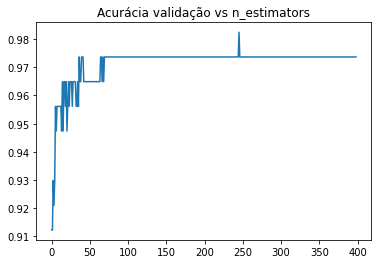

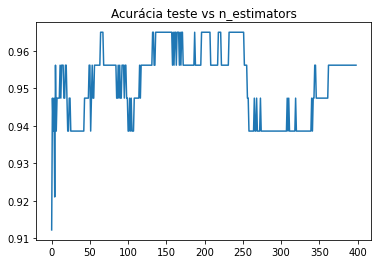

Conjunto de validação - AdaBoost - Acurácia 0.9649122807017544 n_estimators 245
Conjunto de teste - AdaBoost - Acurácia: 0.9736842105263158 n_estimators: 64


In [50]:

plt.title('Acurácia validação vs n_estimators')
plt.plot(accuracy_Xrange, accuracyAB_val)
plt.show()

plt.title('Acurácia teste vs n_estimators')
plt.plot(accuracy_Xrange, accuracyAB_test)
plt.show()

for i in range (0, k):
    
    if (accuracyAB_val[i] == max(accuracyAB_val)):
        print('Conjunto de validação - AdaBoost - Acurácia', accuracyAB_test[i], 'n_estimators', i)
        break
            
for i in range (0, k):
    if (accuracyAB_test[i] == max(accuracyAB_test)):
        print('Conjunto de teste - AdaBoost - Acurácia:', accuracyAB_val[i], 'n_estimators:', i)
        break


In [40]:
#GradientBoost

#gradientBoost = GradientBoostingClassifier(n_estimators=20, random_state=0)

#gradientBoost.fit(X_train, y_train)


#train_pred_GB = gradientBoost.predict(X_train)
#y_pred_GB = gradientBoost.predict(X_val)
#yPredGB = gradientBoost.predict(X_test)

k = 400
accuracyGB_val = []
accuracyGB_test = []
accuracy_Xrange = range(k-1)

for i in range(1, k):
    gradientBoost = GradientBoostingClassifier(n_estimators=i, random_state=0)
    gradientBoost.fit(X_train, y_train)
    
    train_pred_GB = gradientBoost.predict(X_train)
    y_pred_GB = gradientBoost.predict(X_val) #validação
    yPredGB = gradientBoost.predict(X_test) #teste

    accuracyGB_test.append(accuracy_score(y_test, yPredGB))
    accuracyGB_val.append(accuracy_score(y_val, y_pred_GB))

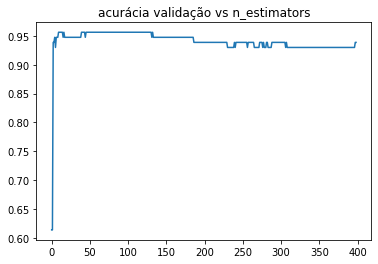

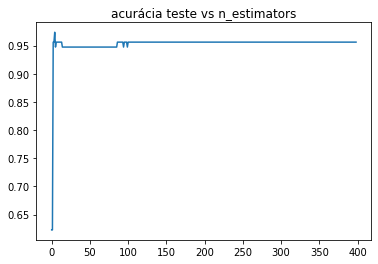

Validação - GradientBoost - Acurácia: 0.956140350877193 n_estimators: 9
Teste - GradientBoost - Acurácia: 0.9473684210526315 n_estimators: 4


In [44]:
plt.title('acurácia validação vs n_estimators')
plt.plot(accuracy_Xrange, accuracyGB_val)
plt.show()

plt.title('acurácia teste vs n_estimators')
plt.plot(accuracy_Xrange, accuracyGB_test)
plt.show()

for i in range (0, k):
    if (accuracyAB_val[i] == max(accuracyAB_val)):
        print('Validação - GradientBoost - Acurácia:', accuracyAB_val[i], 'n_estimators:', i)
        break
    
for i in range (0, k):
    if (accuracyGB_test[i] == max(accuracyGB_test)):
        print('Teste - GradientBoost - Acurácia:', accuracyAB_val[i], 'n_estimators:', i)
        break

    
#print("Acurácia no treino", accuracy_score(y_train, train_pred_GB))
#print("Acurácia na validação", accuracy_score(y_val, y_pred_GB))
#print("Acurácia no teste", accuracy_score(y_test, yPredGB))

**Atividade**

1. Primeiramente, você deverá estudar com detalhes os parâmetros de cada método de geração de conjunto.
ok
2. Utilize a base de validação para ajustar os parâmetros de cada método geração de conjunto a fim de definir a melhor combinação de parâmetros de cada método.
3. Utilize a base de teste para comparar os resultados obtidos pela melhor versão de cada método de geração de conjuntos (definida na base de validação). Qual dos algoritmos de Aprendizagem de Máquina para geração de conjuntos de preditores testados apresentou melhor resultado? Apesente os resultados de comparação.
